In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('final_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,cases
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,2
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,0.0,1025,22,10,99,18,2016,4,0


In [ ]:
df.shape

(174103, 25)

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [ ]:
df.shape

(103045, 25)

#Feature Scaling

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler=MinMaxScaler()
# data = scaler.fit_transform(df)
# data = pd.DataFrame(data, columns= df.columns)
# data.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
feature_scale=[feature for feature in df.columns if feature not in ['cases']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

data = pd.concat([df[['cases']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

,cases,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month
0,2,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.444444,0.87,0.622642,0.619718,0.573770,0.628571,0.164835,0.00,0.559140,0.0,0.602941,0.641791,1.0,0.531429,0.152542,0.333333,0.181818
1,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.444444,0.87,0.622642,0.619718,0.573770,0.628571,0.164835,0.00,0.559140,0.0,0.602941,0.641791,1.0,0.531429,0.152542,0.333333,0.181818
2,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.444444,0.87,0.622642,0.619718,0.573770,0.628571,0.164835,0.00,0.559140,0.0,0.602941,0.641791,1.0,0.531429,0.152542,0.333333,0.181818
3,0,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.444444,0.76,0.698113,0.619718,0.590164,0.628571,0.285714,0.34,0.698925,0.0,0.705882,0.611940,1.0,0.274286,0.288136,0.333333,0.272727
4,1,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.444444,0.76,0.698113,0.619718,0.590164,0.628571,0.285714,0.34,0.698925,0.0,0.705882,0.611940,1.0,0.274286,0.288136,0.333333,0.272727


#Feature Selection

In [ ]:
X = data[['maxtempC', 'mintempC', 'windspeedKmph', 'year', 'month', 'density_per_km', 'precipMM', 'cloudcover',
       'humidity','DewPointC', 'latitude', 'longitude','FeelsLikeC', 'winddirDegree', 'sunHour']]
y = data['cases']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
X_train.shape, Y_train.shape

((82436, 15), (82436,))

In [ ]:
X_test.shape, Y_test.shape

((20609, 15), (20609,))

#Linear Regression 

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)


print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))

Mean squared error (MSE): 482209.83
Coefficient of determination (R^2): 0.01


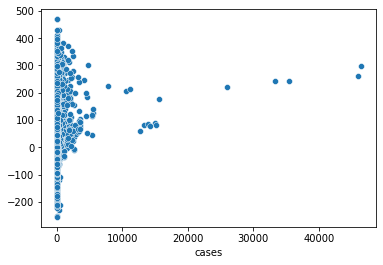

In [ ]:
# Visualising the Linear Regression results
sns.scatterplot(x=Y_test, y=Y_pred)

#Lasso Regression

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores_mse = absolute(scores_mse)
print('Mean MSE: %.3f (%.3f)' % (mean(scores_mse), std(scores_mse)))
print('Mean R2: %.3f (%.3f)' % (mean(scores_r2), std(scores_r2)))

Mean MSE: 526699.455 (233498.049)
Mean R2: 0.005 (0.001)


In [ ]:
# model = linear_model.Lasso()
# model.fit(X_train, Y_train)

# Y_pred = model.predict(X_test)

# print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test, Y_pred))
# print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))

Mean squared error (MSE): 482941.49
Coefficient of determination (R^2): 0.01


#Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from numpy import absolute

model = Ridge(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores_mse = absolute(scores_mse)
print('Mean MSE: %.3f (%.3f)' % (mean(scores_mse), std(scores_mse)))
print('Mean R2: %.3f (%.3f)' % (mean(scores_r2), std(scores_r2)))

Mean MSE: 525815.597 (232546.139)
Mean R2: 0.007 (0.002)
